This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [16]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=25,
    batch_size=512,
    validation_split=0.2,
    verbose=0)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=25,
    batch_size=512,
    validation_split=0.2,
    verbose=0)

model = get_model()
history_orig = model.fit(
    train_images, train_labels,
    epochs = 25,
    batch_size=512,
    validation_split=0.2,
    verbose=0)

**Plotting a validation accuracy comparison**

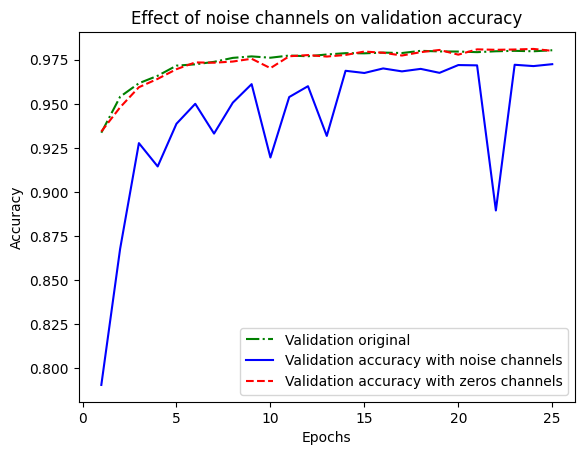

In [19]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_orig = history_orig.history["val_accuracy"]
epochs = range(1, 26)
plt.plot(epochs, val_acc_orig, "g-.",
         label="Validation original")
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "r--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 6s 14ms/step - loss: 2.3153 - accuracy: 0.1017 - val_loss: 2.3052 - val_accuracy: 0.1073
Epoch 2/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2999 - accuracy: 0.1152 - val_loss: 2.3105 - val_accuracy: 0.1045
Epoch 3/100
375/375 [==============================] - 5s 13ms/step - loss: 2.2923 - accuracy: 0.1257 - val_loss: 2.3182 - val_accuracy: 0.1046
Epoch 4/100
375/375 [==============================] - 4s 12ms/step - loss: 2.2807 - accuracy: 0.1369 - val_loss: 2.3232 - val_accuracy: 0.1024
Epoch 5/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2648 - accuracy: 0.1538 - val_loss: 2.3312 - val_accuracy: 0.1015
Epoch 6/100
375/375 [==============================] - 5s 13ms/step - loss: 2.2460 - accuracy: 0.1658 - val_loss: 2.3400 - val_accuracy: 0.1030
Epoch 7/100
375/375 [==============================] - 4s 12ms/step - loss: 2.2224 - accuracy: 0.1814 - val_loss: 2.3567 - val_accuracy:

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [35]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model_high_lr = model.fit(train_images, train_labels,
          epochs=25,
          batch_size=512,
          validation_split=0.2,
          verbose=0)

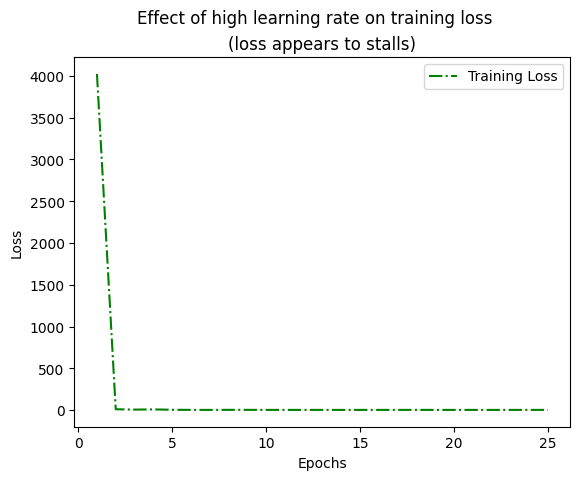

In [54]:
import matplotlib.pyplot as plt
loss_high_lr = model_high_lr.history["loss"]
epochs = range(1, 26)
plt.plot(epochs, loss_high_lr, "g-.",
         label="Training Loss")
plt.suptitle("Effect of high learning rate on training loss")
plt.title("(loss appears to stalls)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**The same model with a more appropriate learning rate**

In [42]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model_low_lr = model.fit(train_images, train_labels,
          epochs=25,
          batch_size=512,
          validation_split=0.2,
          verbose=0)

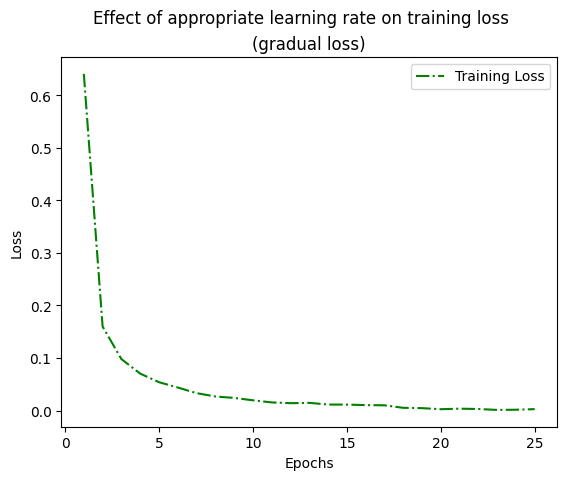

In [55]:
loss_low_lr = model_low_lr.history["loss"]
epochs = range(1, 26)
plt.plot(epochs, loss_low_lr, "g-.",
         label="Training Loss")
plt.suptitle("Effect of appropriate learning rate on training loss")
plt.title("(gradual loss)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [45]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6662 - accuracy: 0.8378 - val_loss: 0.3614 - val_accuracy: 0.9018
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3526 - accuracy: 0.9020 - val_loss: 0.3113 - val_accuracy: 0.9135
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3175 - accuracy: 0.9116 - val_loss: 0.2933 - val_accuracy: 0.9173
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3014 - accuracy: 0.9162 - val_loss: 0.2849 - val_accuracy: 0.9212
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2921 - accuracy: 0.9184 - val_loss: 0.2786 - val_accuracy: 0.9228
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2852 - accuracy: 0.9207 - val_loss: 0.2769 - val_accuracy: 0.9225
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2802 - accuracy: 0.9220 - val_loss: 0.2714 - val_accuracy: 0.9247
Epoch 

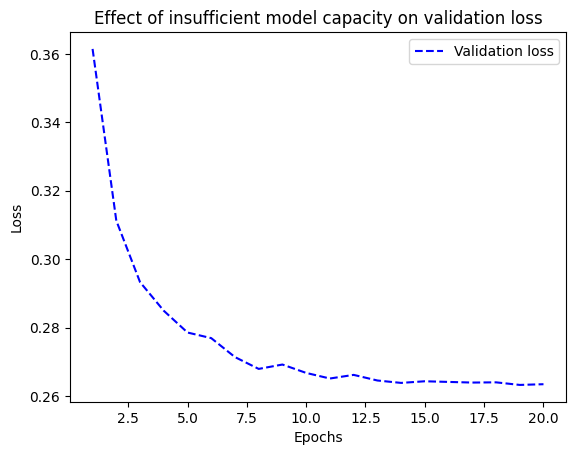

In [46]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [52]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3690 - accuracy: 0.8945 - val_loss: 0.1958 - val_accuracy: 0.9399
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1671 - accuracy: 0.9505 - val_loss: 0.1467 - val_accuracy: 0.9563
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1187 - accuracy: 0.9646 - val_loss: 0.1224 - val_accuracy: 0.9623
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0916 - accuracy: 0.9723 - val_loss: 0.1062 - val_accuracy: 0.9671
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0738 - accuracy: 0.9770 - val_loss: 0.1012 - val_accuracy: 0.9691
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0611 - accuracy: 0.9810 - val_loss: 0.0931 - val_accuracy: 0.9722
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0499 - accuracy: 0.9847 - val_loss: 0.0973 - val_accuracy: 0.9725
Epoch 

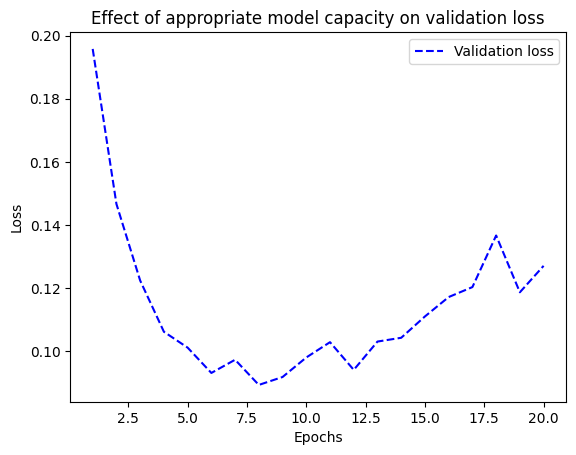

In [53]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of appropriate model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [56]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 5s 141ms/step - loss: 0.5567 - accuracy: 0.7757 - val_loss: 0.4267 - val_accuracy: 0.8622
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3543 - accuracy: 0.8921 - val_loss: 0.3329 - val_accuracy: 0.8776
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2659 - accuracy: 0.9121 - val_loss: 0.2925 - val_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2129 - accuracy: 0.9278 - val_loss: 0.2771 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1784 - accuracy: 0.9398 - val_loss: 0.3116 - val_accuracy: 0.8741
Epoch 6/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1538 - accuracy: 0.9487 - val_loss: 0.2960 - val_accuracy: 0.8828
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1306 - accura

**Version of the model with lower capacity**

In [57]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.6298 - accuracy: 0.6621 - val_loss: 0.5774 - val_accuracy: 0.7218
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.5356 - accuracy: 0.8059 - val_loss: 0.5073 - val_accuracy: 0.8403
Epoch 3/20
30/30 [==============================] - 1s 48ms/step - loss: 0.4611 - accuracy: 0.8713 - val_loss: 0.4505 - val_accuracy: 0.8803
Epoch 4/20
30/30 [==============================] - 5s 172ms/step - loss: 0.3928 - accuracy: 0.9047 - val_loss: 0.3952 - val_accuracy: 0.8824
Epoch 5/20
30/30 [==============================] - 2s 75ms/step - loss: 0.3329 - accuracy: 0.9194 - val_loss: 0.3663 - val_accuracy: 0.8639
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2850 - accuracy: 0.9286 - val_loss: 0.3229 - val_accuracy: 0.8920
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2465 - accuracy: 0.9367 - val_loss: 0.3019 - val_accuracy: 0.8924
Epoch 8/20
3

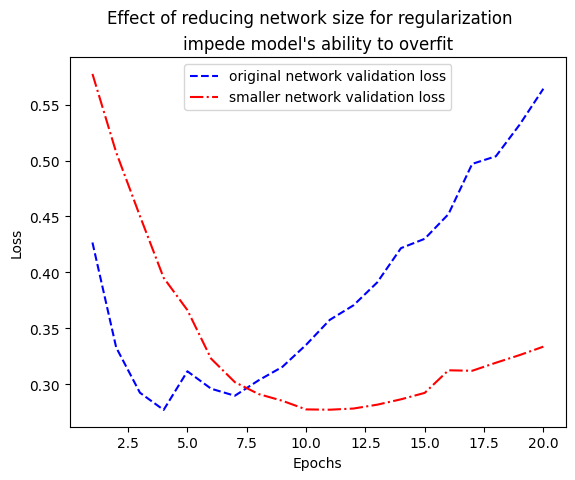

In [59]:
import matplotlib.pyplot as plt
val_loss_orig = history_original.history["val_loss"]
val_loss_small = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_orig, "b--",
         label="original network validation loss")
plt.plot(epochs, val_loss_small, 'r-.',
         label="smaller network validation loss")
plt.suptitle("Effect of reducing network size for regularization")
plt.title("impede model's ability to overfit")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Version of the model with higher capacity**

In [60]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 13s 416ms/step - loss: 0.5781 - accuracy: 0.7319 - val_loss: 0.3538 - val_accuracy: 0.8618
Epoch 2/20
30/30 [==============================] - 10s 346ms/step - loss: 0.3187 - accuracy: 0.8699 - val_loss: 0.2828 - val_accuracy: 0.8860
Epoch 3/20
30/30 [==============================] - 9s 297ms/step - loss: 0.2379 - accuracy: 0.9049 - val_loss: 0.4088 - val_accuracy: 0.8325
Epoch 4/20
30/30 [==============================] - 10s 340ms/step - loss: 0.2017 - accuracy: 0.9196 - val_loss: 0.2681 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 10s 343ms/step - loss: 0.1455 - accuracy: 0.9465 - val_loss: 0.2795 - val_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 10s 343ms/step - loss: 0.1072 - accuracy: 0.9617 - val_loss: 0.3680 - val_accuracy: 0.8625
Epoch 7/20
30/30 [==============================] - 9s 297ms/step - loss: 0.1009 - accuracy: 0.9686 - val_loss: 0.3396 - val_accuracy: 0.8835
E

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

## Summary